<h1>Exploratory Data Analysis</h1>

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Importing the dataset and seeing the surface</h2>
In dataset, samples are ordered by first feature; shuffling them to discard any undesired outcome that might arise while developing the model

In [180]:
data = pd.read_csv('test_scores.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ZOWMK,Urban,Public,Q0E,Experimental,30.0,TAFUM,Male,Qualifies for reduced/free lunch,37.0,53.0
1,OJOBU,Rural,Public,FS3,Standard,19.0,QUDKL,Female,Qualifies for reduced/free lunch,66.0,72.0
2,GJJHK,Suburban,Public,ZDT,Standard,27.0,B1OMF,Male,Qualifies for reduced/free lunch,56.0,66.0
3,CUQAM,Urban,Public,OMI,Standard,28.0,I1E36,Male,Does not qualify,57.0,68.0
4,CIMBB,Urban,Non-public,PC6,Standard,17.0,XJPON,Male,Does not qualify,64.0,74.0


Let's explore the data more in depth and examine some aspects of the categories that are notable

In [181]:
data.school_setting.unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [182]:
data.school_type.unique()

array(['Public', 'Non-public'], dtype=object)

In [183]:
data.teaching_method.unique()

array(['Experimental', 'Standard'], dtype=object)

In [184]:
data.gender.unique()

array(['Male', 'Female'], dtype=object)

In [185]:
data.lunch.unique()

array(['Qualifies for reduced/free lunch', 'Does not qualify'],
      dtype=object)

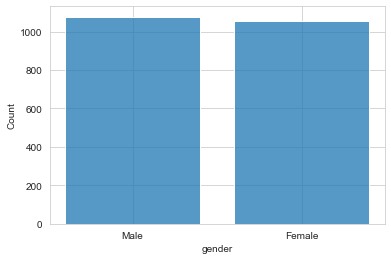

In [186]:
sns.set_style('whitegrid')
sns.histplot(data, x="gender", shrink=0.8)

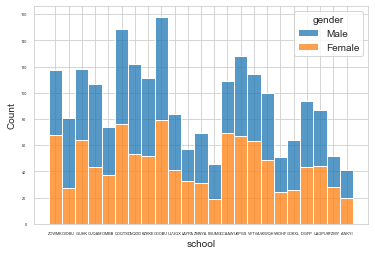

In [187]:
sns.histplot(data, x='school', hue="gender", multiple="stack").tick_params(labelsize=3.9)

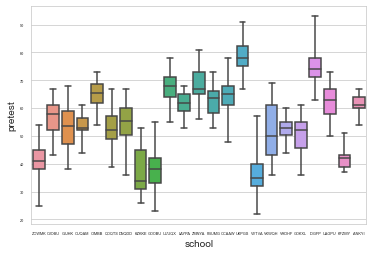

In [188]:
sns.boxplot(data=data, x="school", y="pretest", whis=np.inf).tick_params(labelsize=3.9)

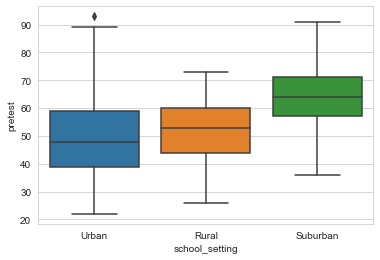

In [189]:
sns.boxplot(data=data,x="school_setting",y="pretest")

Students in suburban schools have better pretest scores and this inference doesn't seem to be biased by population sizes

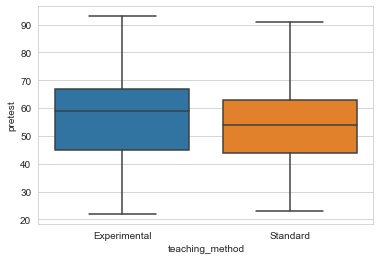

In [190]:
sns.boxplot(data=data,x="teaching_method",y="pretest")

Experimental teaching method seem to give better results

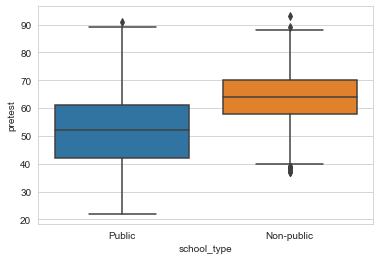

In [191]:
sns.boxplot(data=data,x="school_type",y="pretest")

Descriptive statistics of numeric data and correlation

In [192]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [193]:
correlation = data.corr()
correlation

,n_student,pretest,posttest
n_student,1.000000,-0.499253,-0.504886
pretest,-0.499253,1.000000,0.950884
posttest,-0.504886,0.950884,1.000000


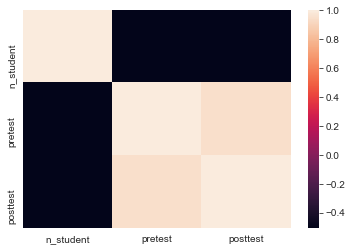

In [194]:
sns.heatmap(correlation)

<h1>Preprocessing</h1>

Encoding categorical data and feature scaling numeric data

In [195]:
featuresToEncode = ['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'student_id', 'gender', 'lunch']
featuresToScale = ['n_student','pretest']

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in featuresToEncode:
    data[feature] = le.fit_transform(data[feature])
data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,22,2,1,66,0,30.0,1752,1,1,37.0,53.0
1,13,0,1,40,1,19.0,1593,0,1,66.0,72.0
2,6,1,1,95,1,27.0,628,1,1,56.0,66.0
3,3,2,1,58,1,28.0,1067,1,0,57.0,68.0
4,2,2,0,62,1,17.0,1997,1,0,64.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,9,2,0,59,0,17.0,1197,1,0,85.0,100.0
2129,20,2,1,24,1,29.0,1900,0,1,38.0,50.0
2130,12,0,1,69,0,17.0,1429,0,0,65.0,80.0
2131,12,0,1,51,1,19.0,875,1,0,62.0,70.0


In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
featuresScaled = pd.DataFrame(scaler.fit_transform(data[featuresToScale]),columns=featuresToScale)
featuresScaled.describe()

,n_student,pretest
count,2133.000000,2133.000000
mean,0.517443,0.464168
std,0.248758,0.191030
min,0.000000,0.000000
25%,0.352941,0.309859
50%,0.470588,0.478873
75%,0.764706,0.605634
max,1.000000,1.000000


In [198]:
data[featuresToScale] = featuresScaled
data

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,22,2,1,66,0,0.941176,1752,1,1,0.211268,53.0
1,13,0,1,40,1,0.294118,1593,0,1,0.619718,72.0
2,6,1,1,95,1,0.764706,628,1,1,0.478873,66.0
3,3,2,1,58,1,0.823529,1067,1,0,0.492958,68.0
4,2,2,0,62,1,0.176471,1997,1,0,0.591549,74.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,9,2,0,59,0,0.176471,1197,1,0,0.887324,100.0
2129,20,2,1,24,1,0.882353,1900,0,1,0.225352,50.0
2130,12,0,1,69,0,0.176471,1429,0,0,0.605634,80.0
2131,12,0,1,51,1,0.294118,875,1,0,0.563380,70.0


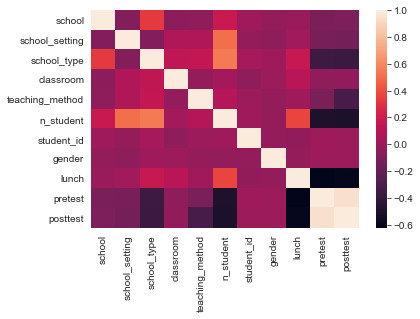

In [199]:
sns.heatmap(data.corr())

In [200]:
X = data.drop('posttest', axis=1)
y = data.posttest

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [202]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9466546214741743, 0.9485823542647366)

In [203]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9462190981199172, 0.948163973334842)

In [204]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.7825700330824898, 0.7782505637984786)

In [205]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01,0.03,0.1,0.3,0,1,3,10,30] , "fit_intercept": [True, False]}
ridge_gscv = GridSearchCV(ridge, param_grid=param_grid)
ridge_gscv.fit(X_train, y_train)
ridge_gscv.best_params_

{'alpha': 0, 'fit_intercept': True}

Turns out applying regularization gives worse performance

In [206]:
ridge0 = Ridge(alpha=0.03).fit(X_train, y_train)
ridge0.score(X_test, y_test)

0.9485833752836611

In [207]:
pred = lr.predict(X_test)

In [208]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(pred, y_test))
print(mean_absolute_error(pred, y_test))

0.9449990074137724
2.520499498873192
